# **1. Perkenalan Dataset**


1. **Nama Dataset**:  
   WhatsApp User Reviews Dataset 
2. **Sumber Dataset**:  
   Kaggle, https://www.kaggle.com/datasets/sonalshinde123/whatsapp-user-reviews-dataset 
3. **Deskripsi Dataset**:

   Dataset ini berisi kumpulan ulasan asli dari pengguna aplikasi seluler whatsapp. Data ini dirancang khusus untuk mendukung berbagai tugas NLP dan Machine Learning. 

# **2. Import Library**

In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt 
import re 
import string 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords 
from wordcloud import WordCloud  
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\WORKPLUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\WORKPLUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\WORKPLUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\WORKPLUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **3. Memuat Dataset**

In [11]:
df = pd.read_csv("../whatsapp_review_raw/whatsapp_reviews.csv") 
df.head()

,review_id,rating,review_text,review_date,helpful
0,56887e3c-1684-4ced-834e-befc7a66fc7d,5,Great 👍,11/26/2025 22:08,0
1,0da4488e-7158-4ea6-bcb9-17b9b3867642,1,plz whats up unban,11/26/2025 22:08,0
2,5a20e8e3-9e00-4360-a539-16953e309a3a,1,my contact didn't show on WhatsApp .. for priv...,11/26/2025 22:06,0
3,0cf26263-1c10-473e-ae15-d6390884fef7,1,Can you guys let archived group chats stay arc...,11/26/2025 22:05,1
4,54eebd96-041e-4baf-a8f1-adf603658c28,5,it is the g.o.a.t🇿🇼,11/26/2025 22:04,0


# **4. Exploratory Data Analysis (EDA)**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    5400 non-null   object
 1   rating       5400 non-null   int64 
 2   review_text  5400 non-null   object
 3   review_date  5400 non-null   object
 4   helpful      5400 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 211.1+ KB


In [13]:
df = df.dropna()

In [14]:
df = df.drop_duplicates()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    5400 non-null   object
 1   rating       5400 non-null   int64 
 2   review_text  5400 non-null   object
 3   review_date  5400 non-null   object
 4   helpful      5400 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 211.1+ KB


C:\Users\WORKPLUS\AppData\Local\Temp\ipykernel_13596\1173912365.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['rating'], palette='viridis')


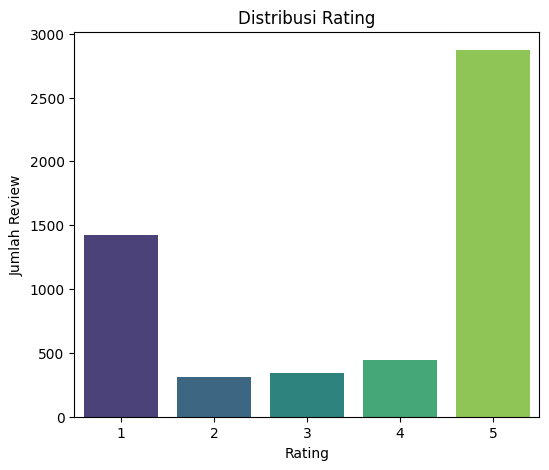

In [16]:
plt.figure(figsize=(6,5))
sns.countplot(x=df['rating'], palette='viridis')
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Jumlah Review')
plt.show()

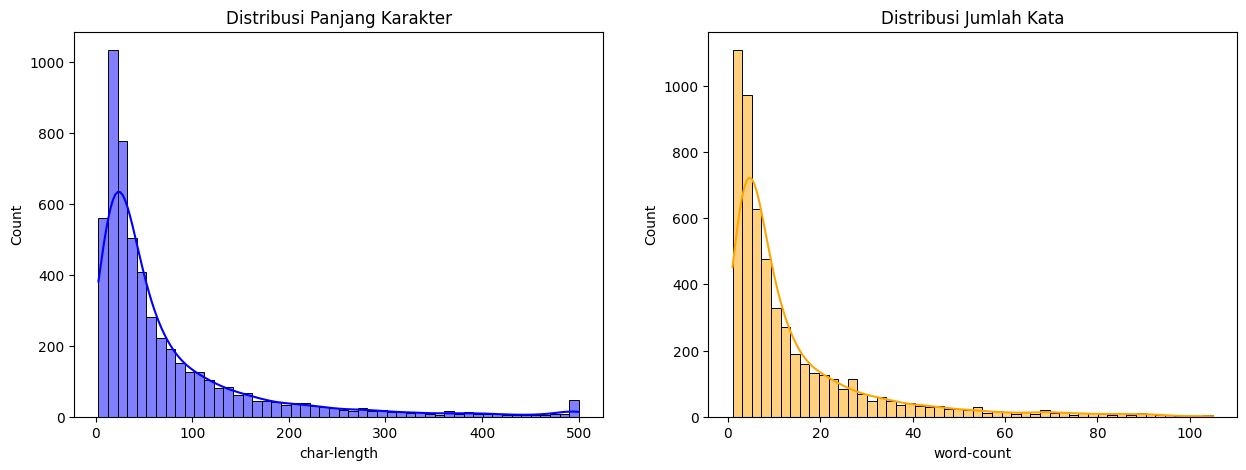

In [17]:
df['char-length'] = df['review_text'].astype(str).apply(len)
df['word-count'] = df['review_text'].apply(lambda x: len(str(x).split()))
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(df['char-length'], bins=50, kde=True, ax=ax[0], color='blue')
ax[0].set_title('Distribusi Panjang Karakter')
sns.histplot(df['word-count'], bins=50, kde=True, ax=ax[1], color='orange')
ax[1].set_title('Distribusi Jumlah Kata')

plt.show()


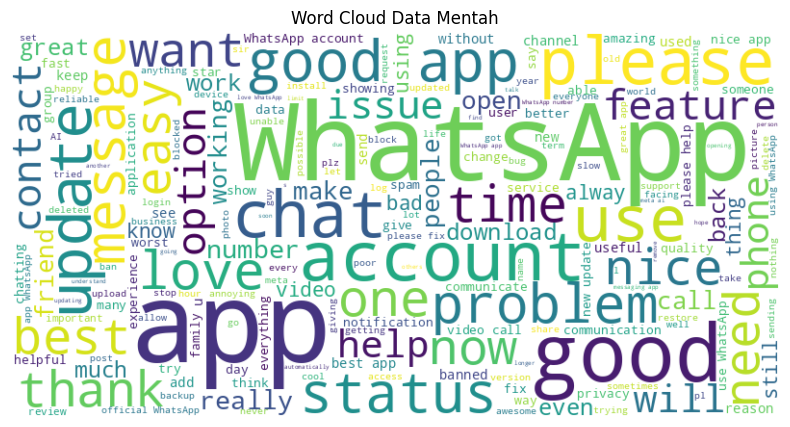

In [18]:
text_gabungan = " ".join(review for review in df['review_text'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_gabungan)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Data Mentah')
plt.show()

# **5. Data Preprocessing**

In [19]:
slang_path = "../whatsapp_review_raw/acrynom.csv" 
slang_df = pd.read_csv(slang_path, header=0, names=['slang', 'formal'])
slang_dict = dict(zip(slang_df['slang'], slang_df['formal']))

In [20]:
def cleaningText(text):
    text = text.encode('ascii','ignore').decode('ascii')
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text 

def caseFolding(text):
    text = text.lower() 
    return text 

def replace_slang(text):
    global slang_dict 
    words = text.split() 
    normalized_word = [] 
    for word in words:
        formal_word = slang_dict.get(word, word)
        normalized_word.append(formal_word)
    text = " ".join(normalized_word)
    return text

def tokenizingText(text):
    listStopwords = set(stopwords.words('english'))
    stopword_dict = {"n't", "'s", "'m", "'re", "...", "u", "ur"}
    listStopwords.update(stopword_dict)
    tokens = word_tokenize(text)
    filtered = [] 
    for txt in tokens:
        if txt not in listStopwords:
            filtered.append(txt) 
    text = filtered 
    return text 

def stemmingText(text):
    stemmer = PorterStemmer() 
    # words = text.split() 
    stemmed_words = [stemmer.stem(word) for word in text]
    # stemmed_text = ' '.join(stemmed_words)
    return stemmed_words 

def lemmatizingText(list_words):
    lemmatizer = WordNetLemmatizer() 
    lemmatized_words = [lemmatizer.lemmatize(word) for word in list_words]
    return lemmatized_words 

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence


In [21]:
clean_df = df.copy()
clean_df.head()

,review_id,rating,review_text,review_date,helpful,char-length,word-count
0,56887e3c-1684-4ced-834e-befc7a66fc7d,5,Great 👍,11/26/2025 22:08,0,7,2
1,0da4488e-7158-4ea6-bcb9-17b9b3867642,1,plz whats up unban,11/26/2025 22:08,0,18,4
2,5a20e8e3-9e00-4360-a539-16953e309a3a,1,my contact didn't show on WhatsApp .. for priv...,11/26/2025 22:06,0,90,16
3,0cf26263-1c10-473e-ae15-d6390884fef7,1,Can you guys let archived group chats stay arc...,11/26/2025 22:05,1,127,23
4,54eebd96-041e-4baf-a8f1-adf603658c28,5,it is the g.o.a.t🇿🇼,11/26/2025 22:04,0,19,4


In [22]:
clean_df['text_clean'] = clean_df['review_text'].apply(cleaningText)
clean_df['text_casefolding'] = clean_df['text_clean'].apply(caseFolding) 
clean_df['text_normalized'] = clean_df['text_casefolding'].apply(replace_slang)
clean_df['text_tokenandstopwords'] = clean_df['text_normalized'].apply(tokenizingText)
clean_df['text_lematizing'] = clean_df['text_tokenandstopwords'].apply(lemmatizingText)
clean_df['text_akhir'] = clean_df['text_lematizing'].apply(toSentence)

In [23]:
clean_df.head()

,review_id,rating,review_text,review_date,helpful,char-length,word-count,text_clean,text_casefolding,text_normalized,text_tokenandstopwords,text_lematizing,text_akhir
0,56887e3c-1684-4ced-834e-befc7a66fc7d,5,Great 👍,11/26/2025 22:08,0,7,2,Great,great,great,[great],[great],great
1,0da4488e-7158-4ea6-bcb9-17b9b3867642,1,plz whats up unban,11/26/2025 22:08,0,18,4,plz whats up unban,plz whats up unban,please whats up unban,"[please, whats, unban]","[please, whats, unban]",please whats unban
2,5a20e8e3-9e00-4360-a539-16953e309a3a,1,my contact didn't show on WhatsApp .. for priv...,11/26/2025 22:06,0,90,16,my contact didnt show on WhatsApp for privacy...,my contact didnt show on whatsapp for privacy...,my contact didnt show on whatsapp for privacy ...,"[contact, didnt, show, whatsapp, privacy, cant...","[contact, didnt, show, whatsapp, privacy, cant...",contact didnt show whatsapp privacy cant share...
3,0cf26263-1c10-473e-ae15-d6390884fef7,1,Can you guys let archived group chats stay arc...,11/26/2025 22:05,1,127,23,Can you guys let archived group chats stay arc...,can you guys let archived group chats stay arc...,can you guys let archived group chats stay arc...,"[guys, let, archived, group, chats, stay, arch...","[guy, let, archived, group, chat, stay, archiv...",guy let archived group chat stay archived arch...
4,54eebd96-041e-4baf-a8f1-adf603658c28,5,it is the g.o.a.t🇿🇼,11/26/2025 22:04,0,19,4,it is the goat,it is the goat,it is the goat,[goat],[goat],goat


# **6. Labelling**

In [24]:
def labelling(rating):
    if rating >=4:
        return 1 
    else:
        return 0 

clean_df['label'] = clean_df['rating'].apply(labelling)

<Axes: xlabel='label'>

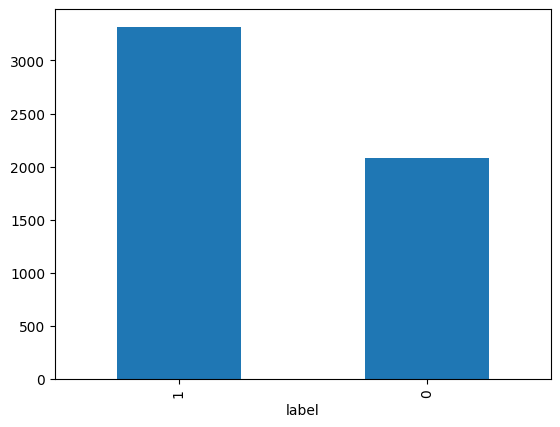

In [25]:
clean_df['label'].value_counts().plot(kind='bar')

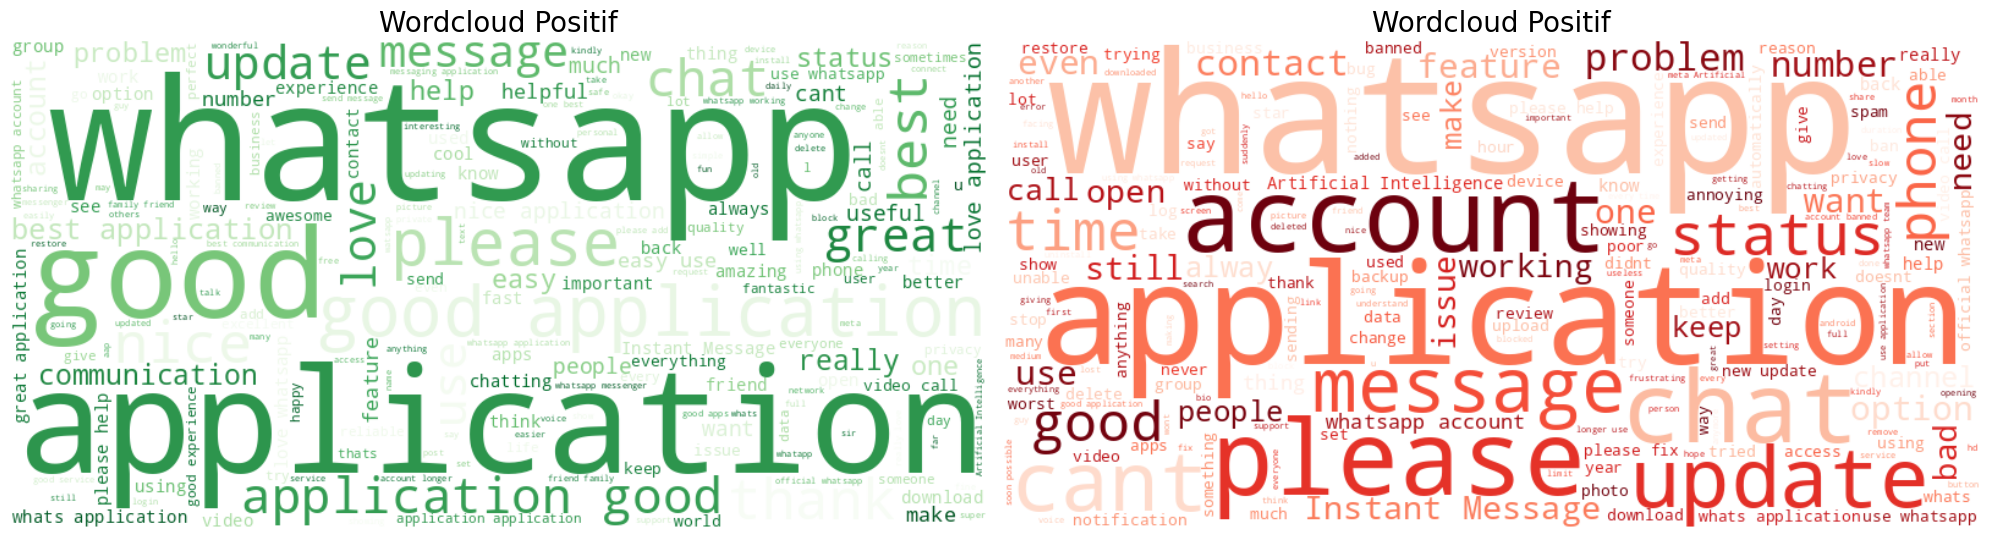

In [26]:
text_positive = ' '.join(clean_df[clean_df['label']==1]['text_akhir'].astype(str))
text_negative = ' '.join(clean_df[clean_df['label']==0]['text_akhir'].astype(str))

wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(text_positive)
wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text_negative)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))

axes[0].imshow(wc_pos, interpolation='bilinear')
axes[0].set_title('Wordcloud Positif', fontsize=20)
axes[0].axis('off') 

axes[1].imshow(wc_neg, interpolation='bilinear')
axes[1].set_title('Wordcloud Positif', fontsize=20)
axes[1].axis('off') 

plt.tight_layout()
plt.show()

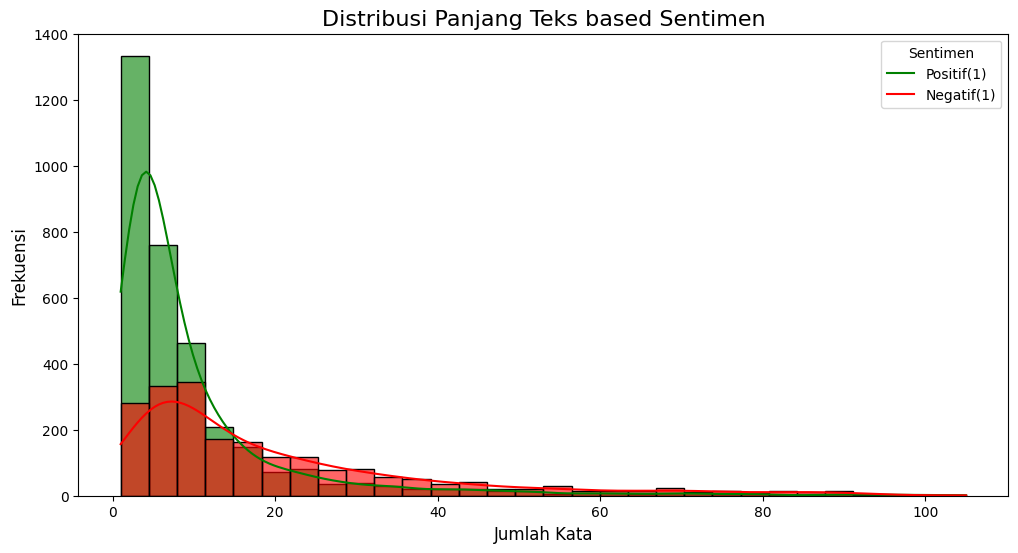

In [27]:
clean_df['word_count'] = clean_df['review_text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12,6))

sns.histplot(
    data=clean_df, 
    x='word_count', 
    hue='label', 
    kde=True, 
    palette={0:'red', 1 : 'green'}, 
    bins = 30, 
    alpha=0.6
) 

plt.title('Distribusi Panjang Teks based Sentimen', fontsize=16)
plt.xlabel('Jumlah Kata', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend(title='Sentimen', labels=['Positif(1)', 'Negatif(1)'])
plt.show()

C:\Users\WORKPLUS\AppData\Local\Temp\ipykernel_13596\2443737647.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_pos, x='Frequency', y='Word', ax=axes[0], palette='Greens_r')
C:\Users\WORKPLUS\AppData\Local\Temp\ipykernel_13596\2443737647.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_neg, x='Frequency', y='Word', ax=axes[1], palette='Reds_r')


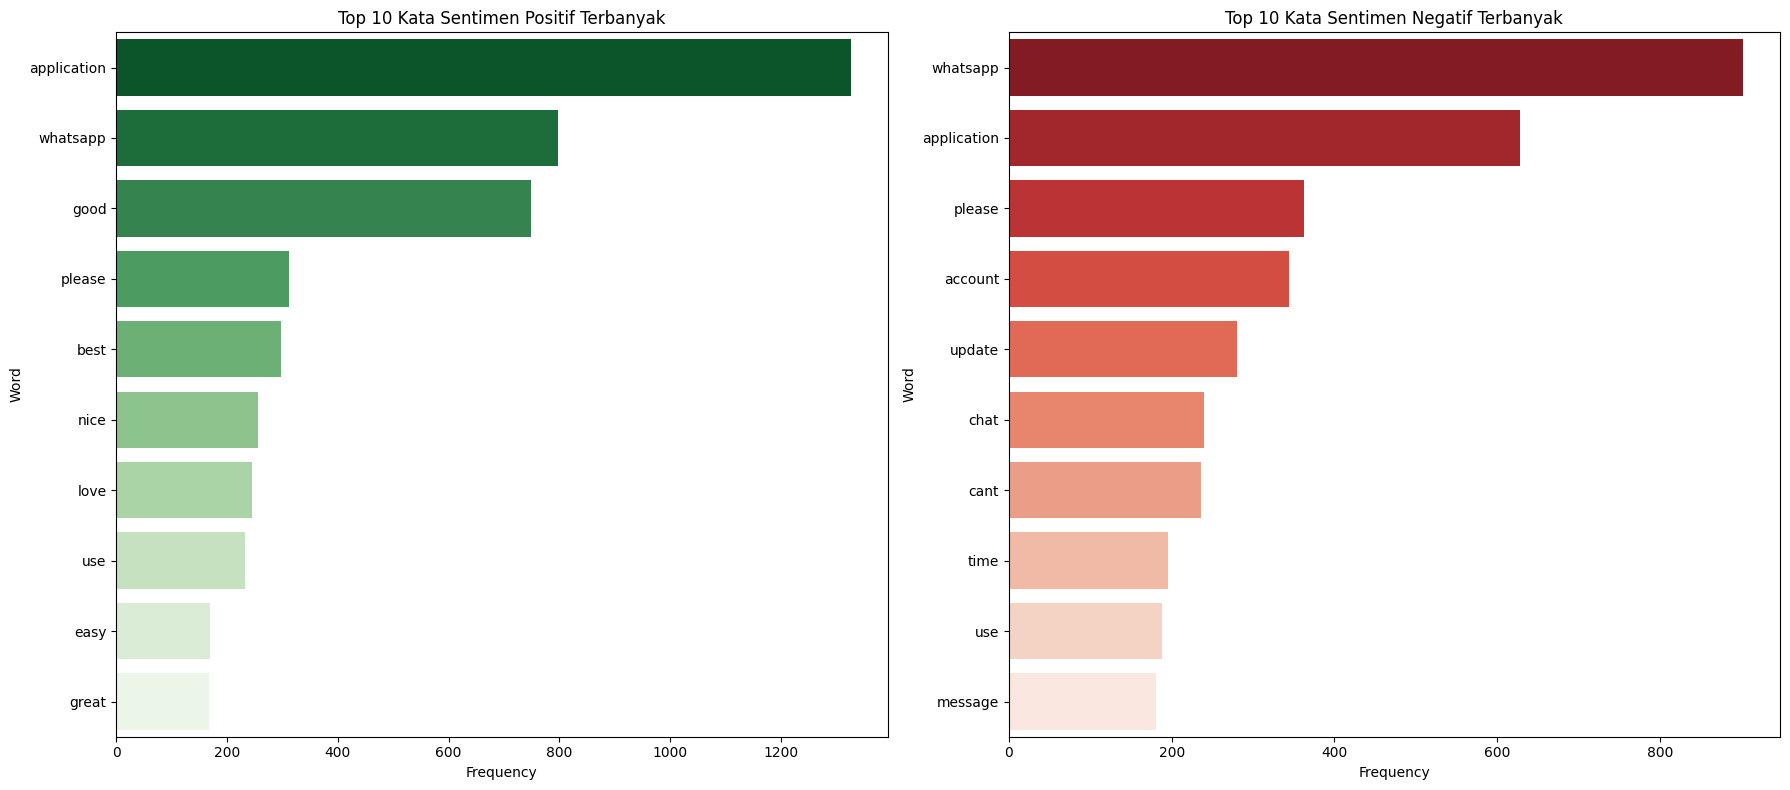

In [28]:
from collections import Counter 

def get_top_n_words(text_series, n=10):
    all_words = ' '.join(text_series.astype(str)).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n) 

top_words_pos = get_top_n_words(clean_df[clean_df['label']==1]['text_akhir'], n=10)
top_words_neg = get_top_n_words(clean_df[clean_df['label']==0]['text_akhir'], n=10) 

df_pos = pd.DataFrame(top_words_pos, columns=['Word', 'Frequency'])
df_neg = pd.DataFrame(top_words_neg, columns=['Word', 'Frequency']) 

fig, axes = plt.subplots(1,2,figsize=(18,8))

sns.barplot(data=df_pos, x='Frequency', y='Word', ax=axes[0], palette='Greens_r')
axes[0].set_title('Top 10 Kata Sentimen Positif Terbanyak') 

sns.barplot(data=df_neg, x='Frequency', y='Word', ax=axes[1], palette='Reds_r')
axes[1].set_title('Top 10 Kata Sentimen Negatif Terbanyak') 

plt.tight_layout()
plt.show()

# **7. Data Splitting**

In [29]:
X = clean_df['text_akhir']
y = clean_df['label'] 

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score, precision_score 

tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df = 0.8)
X_tfidf = tfidf.fit_transform(X)

In [31]:
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
features_df

,able,access,account,add,allow,also,always,amazing,annoying,anything,...,whats,whatsapp,without,wont,work,working,world,worst,would,year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.813432,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.163213,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.793412,0.0,0.0,0.0
5398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)